In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [15]:
TITLE_SIZE = 18
HIST_BINS = 50
rng = np.random.default_rng(42)

In [7]:
#3000 vehicles per hour
#2000 vehicles per hour
#1000 vehicles per hour
def vehicle_rate(vph):
    return vph / 3600

In [8]:
numbers_of_vehicle = [3000, 2000, 1000]
vehicle_rates = np.array([vehicle_rate(3000),vehicle_rate(2000),vehicle_rate(1000)])
df = pd.DataFrame({
    "number of vehicles per hour": numbers_of_vehicle,
    "vehicle rate": vehicle_rates
}
)

In [ ]:
df = pd.DataFrame(columns= [
    [Time]
])

In [13]:
df.set_index("number of vehicles per hour")

,vehicle rate
number of vehicles per hour,
3000,0.833333
2000,0.555556
1000,0.277778


In [8]:
number_traffic_cycle = 3600/120
number_traffic_cycle

30.0

In [11]:
average_vehicle_per_cycle = 1000/30
average_vehicle_per_cycle

33.333333333333336

In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import Markdown
rng = np.random.default_rng(42)
interarrival_times = rng.exponential(scale=2.0, size=100)
arrival_times = np.cumsum(interarrival_times)

In [24]:
from scipy.stats import binned_statistic

arrival_times
bin_means = binned_statistic(arrival_times, arrival_times, bins=10)

<AxesSubplot:xlabel='arrive_time', ylabel='Proportion'>

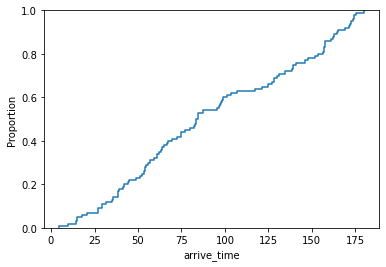

In [15]:
import seaborn as sns
arrival_times = pd.DataFrame({
    "arrive_time": arrival_times
})
sns.ecdfplot(data=arrival_times, x="arrive_time")

In [25]:
from scipy.special import smirnov
x =smirnov(5, arrival_times)


In [70]:
inter_df = pd.DataFrame(interarrival_times, columns =['Interarrival Times Generated'])

In [71]:
inter_df

,Interarrival Times Generated
0,4.808417
1,4.672379
2,4.769522
3,0.559589
4,0.172875
...,...
95,1.062039
96,0.609662
97,0.151477
98,1.007120


In [34]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

normalised_interarrival_times = NormalizeData(interarrival_times)

In [39]:
np.sort(normalised_interarrival_times)

array([0.        , 0.00440819, 0.00540979, 0.00634052, 0.00932103,
       0.00981114, 0.01032361, 0.01057669, 0.01099589, 0.01234653,
       0.01331838, 0.01825435, 0.02051411, 0.0214186 , 0.02294327,
       0.02507845, 0.02734036, 0.02764677, 0.0299679 , 0.03141157,
       0.03393095, 0.03827689, 0.04099087, 0.04890662, 0.0489548 ,
       0.04970934, 0.05060621, 0.05214991, 0.05364056, 0.05559723,
       0.05668576, 0.05687012, 0.05825627, 0.05879073, 0.06101518,
       0.06300623, 0.06432577, 0.0690129 , 0.06915728, 0.06949486,
       0.07121097, 0.07409049, 0.07486598, 0.08082738, 0.08171695,
       0.08318585, 0.09121639, 0.09640851, 0.10255714, 0.10803785,
       0.11349452, 0.11730897, 0.12000137, 0.12558385, 0.12996488,
       0.13838354, 0.15125179, 0.16218881, 0.1664024 , 0.17086905,
       0.17278578, 0.17687814, 0.19330713, 0.19388749, 0.20083891,
       0.20098219, 0.20191638, 0.20815908, 0.21043332, 0.22802131,
       0.22887213, 0.23185967, 0.23504018, 0.24028702, 0.24445

In [68]:
df = pd.DataFrame(normalised_interarrival_times, columns =['Normalised Interarrival Times Generated'])

In [69]:
df


,Normalised Interarrival Times Generated
0,0.450593
1,0.437732
2,0.446916
3,0.048907
4,0.012347
...,...
95,0.096409
96,0.053641
97,0.010324
98,0.091216


In [60]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(normalised_interarrival_times, 'expon')


KstestResult(statistic=0.5972503604472983, pvalue=1.3282294053244986e-34)

In [66]:
import math
alpha = 1.36/ math.sqrt(100)

In [67]:
alpha

0.136

In [25]:
truncated_to_traffic = np.delete(arrival_times, np.argwhere(arrival_times > 130))

In [26]:
truncated_to_traffic

array([  4.80841721,   9.48079652,  14.25031852,  14.8099071 ,
        14.9827819 ,  17.88810293,  20.70802432,  26.95661623,
        27.11520463,  29.20832632,  29.34919893,  31.52724619,
        34.98990089,  35.76369054,  38.22686187,  38.53440838,
        38.71756291,  39.34792132,  41.15031987,  41.97629053,
        44.47106243,  44.91821517,  48.5941557 ,  51.04832742,
        52.35991973,  53.19409315,  54.10073252,  54.25488682,
        54.61415133,  55.98479223,  56.7621527 ,  59.29056642,
        60.70754767,  61.18340758,  62.10558425,  63.38869773,
        64.07636445,  64.72018689,  66.47801626,  67.07191067,
        69.73931552,  72.5210435 ,  74.68920935,  74.83526605,
        77.10340105,  79.81207703,  82.05615633,  82.61625457,
        83.25812695,  83.58959877,  84.29832579,  84.34060531,
        84.6753181 ,  87.30543179,  95.29694433,  96.42402051,
        96.99209992,  97.78761243,  98.51029687,  98.76956408,
       100.93621435, 103.68791205, 106.70353032, 117.32

In [27]:
interarrival_times2 = rng.exponential(scale=2.0, size=100)
arrival_times2 = np.cumsum(interarrival_times)
truncated_to_traffic2 = np.delete(arrival_times, np.argwhere(arrival_times > 130))

In [28]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=truncated_to_traffic, f_exp=truncated_to_traffic2)


Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [16]:
observed = np.array([5,3,3,7,8,3,2,3,3,2,4,3,2])
value = observed.mean()
expected = np.full((1,13), value)
difference = np.subtract(expected, observed)
difference_pow2 = np.power(difference, 2)
chivalues = difference_pow2 / expected

In [ ]:
chi_df = pd.DataFrame({
        "Intervals": observed,
        "Observed, O": expected,
        "Expected, E": difference,
        "O - E": np.zeros(n),
        "(O - E) ^ 2": np.zeros(n)
        "((O - E) ^ 2)/ E": np.zeros(n)
    })

In [18]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observed)

Power_divergenceResult(statistic=3.073170731707317, pvalue=0.9950050147855298)

In [1]:
interarrival_time_estimates1 = 2.708
interarrival_time_estimates2 = 2.167
interarrival_time_estimates3 = 6.500
interarrival_time_estimates4 = 26

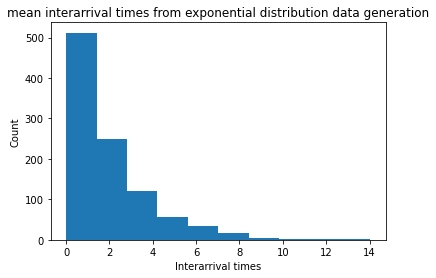

In [46]:
interarrival_time_estimates = 2.708

n = 1000
interarrival_times = rng.exponential(scale=mean_interarrival_time, size=n)
arrival_times = np.cumsum(interarrival_times)
plt.title("mean interarrival times from exponential distribution data generation")
plt.xlabel("Interarrival times")
plt.ylabel("Count")
plt.hist(interarrival_times, bins = 10)
plt.show()




In [48]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(interarrival_times, 'norm')



KstestResult(statistic=0.500844457860763, pvalue=1.5479402297853359e-232)

In [49]:
interarrival_times.mean()

1.9671607808306848

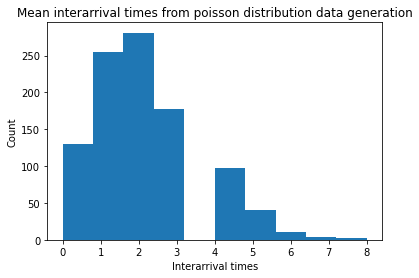

In [50]:
mean_interarrival_time = 2.0
interarrival_times = rng.poisson(mean_interarrival_time, 1000)
arrival_times = np.cumsum(interarrival_times)
plt.title("Mean interarrival times from poisson distribution data generation")
plt.xlabel("Interarrival times")
plt.ylabel("Count")
plt.hist(interarrival_times, bins = 10)
plt.show()

In [51]:
from scipy.stats import kstest
kstest(interarrival_times, 'norm')

KstestResult(statistic=0.7113447460685429, pvalue=0.0)

In [52]:
interarrival_times.mean()

2.058

In [10]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(arrival_times, 'norm')


KstestResult(statistic=1.0, pvalue=0.0)

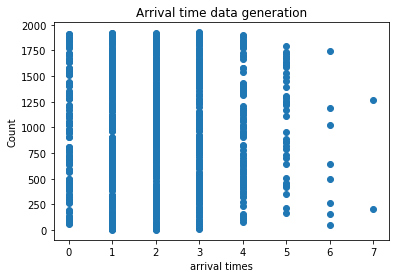

In [21]:

plt.title("Arrival time data generation")
plt.xlabel("arrival times")
plt.ylabel("Count")
plt.scatter(interarrival_times, arrival_times)


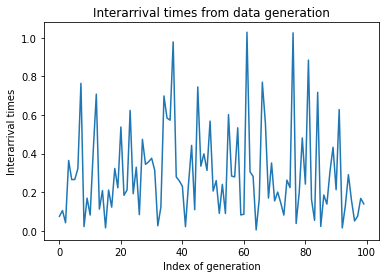

In [12]:
plt.title("Interarrival times from data generation")
plt.xlabel("Index of generation")
plt.ylabel("Interarrival times")
plt.plot(interarrival_times)

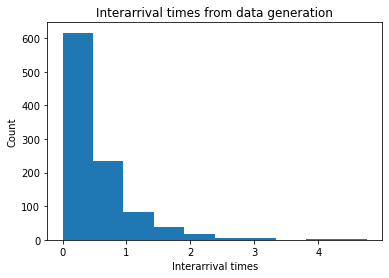

In [25]:
# df_interarrival_times = pd.DataFrame(interarrival_times, columns =['Interarrival times', 'Count'])


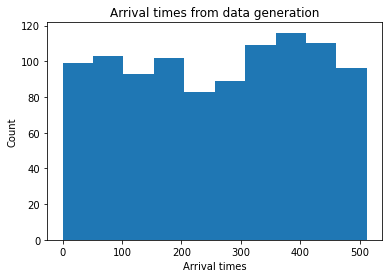

In [26]:
plt.title("Arrival times from data generation")
plt.xlabel("Arrival times/ s")
plt.ylabel("Count")
plt.hist(arrival_times, bins = 10)
plt.show()

In [13]:
delay_times = rng.triangular(left=3.0, mode=5.0, right=10.0, size= n)

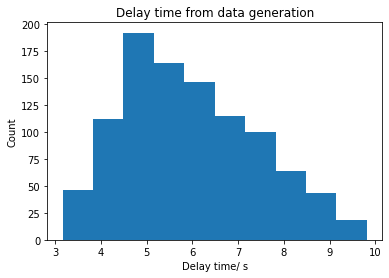

In [14]:
plt.title("Delay time from data generation")
plt.xlabel("Delay time/ s")
plt.ylabel("Count")
plt.hist(delay_times, bins = 10)
plt.show()


In [15]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(delay_times, 'norm')

KstestResult(statistic=0.9992228917305517, pvalue=0.0)

## Simulation

In [63]:
# lambda = mean_arrival_rate
# mu = mean_departure_rate
# QS = straight lane
# QR = right lane
# TL = traffic light state
# T_RED = length or red
# N(t) = number of vehicles entering at the time t

def run_sim_and_plot(n, mean_arrival_rate, mean_departure_rate):
    params = build_params(n, mean_arrival_rate, mean_departure_rate)
    display(Markdown(
        f"### Simulation: n={n}, " +
        f"$\lambda$={format(params['mean_arrival_rate'])}, " + 
         f"$\mu$={format(params['mean_departure_rate'])}, " +
        f"$1/\lambda$={format(params['mean_interarrival_time'])}, " +
        f"$1/\mu$={format(params['mean_departure_time'])}"
    ))
    traffic_light_init = traffic_light_init()
    result = run_sim(params, traffic_light_init)
    dump_stats(result)
    plot_result(result)

def build_params(num_vehicles, mean_arrival_rate, mean_departure_rate):
    return {
        "n": num_vehicles,
        "mean_arrival_rate": mean_arrival_rate,
        "mean_departure_rate": mean_departure_rate,
        "mean_interarrival_time": 1.0 / mean_arrival_rate,
        "mean_departure_time": 1.0 / mean_departure_rate,
        "num_bins": int(num_vehicles / mean_arrival_rate)
    }
    
def run_sim(params, traffic_light_init):
    n = params["n"]
    
    # Parameters
    mean_interarrival_time = params["mean_interarrival_time"]
    mean_departure_time = params["mean_departure_time"]
    
    
    
    # Simulation data and results
    interarrival_times = rng.exponential(scale=mean_interarrival_time, size=n)
    arrival_times = np.cumsum(interarrival_times)
    
    if(traffic_light_init == 100):
        wait_traffic_light_time = arrival_times
    
    
    departure_times = rng.exponential(scale=mean_departure_time, size=n)
    vehicles_df = build_vehicles_df(params, interarrival_times, arrival_times, departure_times)
    events_df = build_events_df(params, vehicles_df)
    total_width = get_total_width(vehicles_df)
    
    sim_mean_interarrival_time = vehicles_df["interarrival_time"].mean()
    sim_mean_arrival_rate = 1.0 / sim_mean_interarrival_time
    sim_mean_departure_time = vehicles_df["departure_time"].mean()
    sim_mean_departure_rate = 1.0 / sim_mean_departure_time
    sim_mean_wait_time = vehicles_df["wait_time"].mean()
    sim_response_time_mean = vehicles_df["response_time"].mean()
    sim_response_time_var = vehicles_df["response_time"].var()
    
    # mean_num_vehicles_in_system and mean_num_vehicles_in_queue
    width = events_df["width"]
    total_weighted_num_vehicles_in_system = (width * events_df["num_vehicles_in_system"]).sum()
    total_weighted_num_vehicles_in_queue = (width * events_df["num_vehicles_in_queue"]).sum()
    sim_mean_num_vehicles_in_system = total_weighted_num_vehicles_in_system / total_width
    sim_mean_num_vehicles_in_queue = total_weighted_num_vehicles_in_queue / total_width
    
    # throughput mean and variance
    departures = events_df.loc[events_df["num_vehicles_in_system_change"] == -1.0, "lo_bd"]
    hist, _ = np.histogram(departures, bins=int(total_width) + 1)
    sim_throughput_mean = np.mean(hist)
    
    # utilization
    util = estimate_util(vehicles_df)
    
    return {
        "params": params,
        "vehicles_df": vehicles_df,
        "events_df": events_df,
        "total_duration": total_width,
        "mean_arrival_rate": sim_mean_arrival_rate,
        "mean_interarrival_time": sim_mean_interarrival_time,
        "mean_departure_rate": sim_mean_departure_rate,
        "mean_departure_time": sim_mean_departure_time,
        "mean_wait_time": sim_mean_wait_time,
        "response_time_mean": sim_response_time_mean,
        "response_time_var": sim_response_time_var,
        "mean_num_vehicles_in_system": sim_mean_num_vehicles_in_system,
        "mean_num_vehicles_in_queue": sim_mean_num_vehicles_in_queue,
        "throughput_mean": sim_throughput_mean,
        "utilization": util,
    }

def departure_event():
    constant = 2.0
    starting_time = random.triangular(low = 3, high = 10, mode = 5)
    
def traffic_light_init():
    traffic_red_time = 100
    traffic_yellow_time = 5
    traffic_green_time = 25
    traffic_state = [traffic_red_time, traffic_yellow_time, traffic_green_time]
    return traffic_light_init = np.random.choice(traffic_state)
    

def build_vehicles_df(params, interarrival_times, arrival_times, departure_times):    
    n = params["n"]
    
    vehicles_df = pd.DataFrame({
        "interarrival_time": interarrival_times,
        "arrive_time": arrival_times,
        "departure_time": departure_times,
        "start_time": np.zeros(n),
        "depart_time": np.zeros(n)
    })
    # first record inside the vehicle data frame
    vehicles_df.loc[0, "start_time"] = vehicles_df.loc[0, "arrive_time"]
    vehicles_df.loc[0, "depart_time"] = vehicles_df.loc[0, "start_time"] + vehicles_df.loc[0, "departure_time"]
    
    # other records inside the vehcile data frame
    for i in range(1, n):
        vehicles_df.loc[i, "start_time"] = max(vehicles_df.loc[i, "arrive_time"], vehicles_df.loc[i-1, "depart_time"])
        vehicles_df.loc[i, "depart_time"] = vehicles_df.loc[i, "start_time"] + vehicles_df.loc[i, "departure_time"]
    
    vehicles_df["response_time"] = vehicles_df["depart_time"] - vehicles_df["arrive_time"]
    vehicles_df["wait_time"] = vehicles_df["start_time"] - vehicles_df["arrive_time"]
        
    return vehicles_df

# Serialize the vehicles into events (arrival, start, departure) so we can compute vehicles counts.
def build_events_df(params, vehicles_df):
    n = params["n"]
    arrivals = vehicles_df["arrive_time"]
    starts = vehicles_df["start_time"]
    departures = vehicles_df["depart_time"]
    
    # width = up_bd - lo_bd, num_vehicles_in_queue = num_vehicles_in_system - 1
    events_df = pd.DataFrame(columns=["lo_bd", "up_bd", "width", "num_vehicles_in_system", "num_vehicles_in_queue"])

    lo_bd = 0.0
    arrive_idx = 0
    start_idx = 0
    depart_idx = 0
    num_vehicles_in_system = 0
    num_vehicles_in_queue = 0
    
    while depart_idx < n:
        arrival = arrivals[arrive_idx] if arrive_idx < n else float("inf")
        start = starts[start_idx] if start_idx < n else float("inf")
        departure = departures[depart_idx]
                        
        if arrival <= start and arrival <= departure:
            up_bd = arrival
            n_change, nq_change = 1, 1
            arrive_idx = arrive_idx + 1        
        elif start <= arrival and start <= departure:
            up_bd = start
            n_change, nq_change = 0, -1
            start_idx = start_idx + 1
        else:
            up_bd = departure
            n_change, nq_change = -1, 0
            depart_idx = depart_idx + 1
                
        width = up_bd - lo_bd
        events_df = events_df.append({
            "lo_bd": lo_bd,
            "up_bd": up_bd,
            "width": width,
            "num_vehicles_in_system": num_vehicles_in_system,
            "num_vehicles_in_queue": num_vehicles_in_queue,
            "num_vehicles_in_system_change": n_change,
            "num_vehicles_in_queue_change": nq_change,
        }, ignore_index=True)
        
        num_vehicles_in_system = num_vehicles_in_system + n_change
        num_vehicles_in_queue = num_vehicles_in_queue + nq_change

        lo_bd = up_bd
    
    return events_df

def get_total_width(vehicles_df):
    return vehicles_df.iloc[-1]["depart_time"] - vehicles_df.iloc[0]["arrive_time"]

def estimate_util(vehicles_df):
    busy = (vehicles_df["depart_time"] - vehicles_df["start_time"]).sum()
    return busy / get_total_width(vehicles_df)

In [64]:
# STATS DUMPS

def format(value):
    return f"{value:,.4f}"

def dump_stats(result):
    params = result["params"]
    vehicles_df = result["vehicles_df"]
    response_time = vehicles_df["response_time"]
    arrival_rate_mean = result["mean_arrival_rate"]
    departure_rate_mean = result["mean_departure_rate"]
    departure_time_mean = result["mean_departure_time"]
    response_time_mean = result["response_time_mean"]
    throughput_mean = result["throughput_mean"]
    util = result["utilization"]
    num_vehicles_in_system_mean = result["mean_num_vehicles_in_system"]
    
    print("Simulation statistics")
    print("---------------------")
    print("total_duration          = " + format(result['total_duration']))
    print("arrival_rate_mean       = " + format(arrival_rate_mean))
    print("interarrival_time_mean  = " + format(result['mean_interarrival_time']))
    # Note: E[response_time] = E[wait_time] + E[departure_time]
    print("response_time")
    print("  mean                  = " + format(response_time_mean))
    print("  var                   = " + format(result['response_time_var']))
    print("  p50                   = " + format(np.quantile(response_time, .5)))
    print("  p75                   = " + format(np.quantile(response_time, .75)))
    print("  p90                   = " + format(np.quantile(response_time, .90)))
    print("  p95                   = " + format(np.quantile(response_time, .95)))
    print("  p99                   = " + format(np.quantile(response_time, .99)))
    print("wait_time_mean          = " + format(result['mean_wait_time']))
    print("departure_rate_mean       = " + format(departure_rate_mean))
    print("departure_time_mean       = " + format(departure_time_mean))
    print("num_vehicles_in_system_mean = " + format(num_vehicles_in_system_mean))
    print("num_vehicles_in_queue_mean  = " + format(result['mean_num_vehicles_in_queue']))
    print("throughput_mean         = " + format(throughput_mean))
    print("utilization             = " + format(util))
    print("")
    print("Little's Law: E[N] = lambda * E[T]")
    print("----------------------------------")
    print("num_vehicles_in_system_mean                = " + format(num_vehicles_in_system_mean))
    print("arrival_rate_mean * response_time_mean = " + format(arrival_rate_mean * response_time_mean) +
          " (= " + format(arrival_rate_mean) + " * " + format(response_time_mean) + ")")
    print("")
    print("Utilization Law, version 1: rho_i = lambda_i / mu_i")
    print("---------------------------------------------------")
    print("utilization                            = " + format(util))
    print("arrival_rate_mean                      = " + format(arrival_rate_mean))
    print("departure_rate_mean                      = " + format(departure_rate_mean))
    print("arrival_rate_mean / departure_rate_mean  = " + format(arrival_rate_mean / departure_rate_mean) +
          " (= " + format(arrival_rate_mean) + " / " + format(departure_rate_mean) + ")")
#     print("")
#     print("Utilization Law, version 2: rho_i = X_i * E[S]")
#     print("----------------------------------------------")
#     print("utilization                            = " + format(util))
#     print("throughput_mean                        = " + format(throughput_mean))
#     print("departure_time_mean                      = " + format(departure_time_mean))
#     print("throughput_mean * departure_time_mean    = " + format(throughput_mean * departure_time_mean) +
#           " (= " + format(throughput_mean) + " * " + format(departure_time_mean) + ")")

In [65]:
# PLOTTING FUNCTIONS

def plot_result(result):
    params = result["params"]
    vehicles_df = result["vehicles_df"]
    events_df = result["events_df"]
    
    _plot_vehicles_gantt(params, vehicles_df)
    _plot_vehicles_over_time(events_df)
    _plot_histogram(params, vehicles_df["interarrival_time"], "Histogram of interarrival times", "Interarrival time")
    _plot_histogram(params, vehicles_df["arrive_time"], "Histogram of arrival times", "Arrival time")
    _plot_histogram(params, vehicles_df["wait_time"], "Histogram of wait times", "Wait time")
    _plot_histogram(params, vehicles_df["departure_time"], "Histogram of departure times", "Service time")
    _plot_histogram(params, vehicles_df["response_time"], "Histogram of response times", "Response time")

def _plot_histogram(params, data, title, xlabel):
    plt.figure(figsize=(14, 2))
    plt.title(title, size=TITLE_SIZE)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.hist(data, bins=HIST_BINS)
    plt.show()

def _plot_vehicles_gantt(params, vehicles_df):
    n = params["n"]
    start_job = int(n / 2)
    end_job = start_job + 40
    trunc_df = vehicles_df[start_job:end_job]
    
    plt.figure(figsize=(14, 8))
    plt.title("Vehicle schedule (partial view)", size=TITLE_SIZE)
    plt.xlabel("Time")
    plt.ylabel("Vehicle ID")
    plt.barh(
        y=trunc_df.index,
        left=trunc_df["arrive_time"],
        width=trunc_df["response_time"],
        alpha=1.0,
        color="lightgrey")
    plt.barh(
        y=trunc_df.index,
        left=trunc_df["start_time"],
        width=trunc_df["departure_time"],
        alpha=1.0,
        color="limegreen")
    plt.gca().invert_yaxis()
    plt.grid(axis="x")
    plt.show()


def _plot_vehicles_over_time(events_df):
    plt.figure(figsize=(14, 2))
    plt.title("# Vehicle in system over time", size=TITLE_SIZE)
    plt.xlabel("Time")
    plt.ylabel("Vehicle count")
    plt.plot(events_df["lo_bd"], events_df["num_vehicles_in_system"])
    plt.show()

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=64.0000, $1/\lambda$=0.0625, $1/\mu$=0.0156

Simulation statistics
---------------------
total_duration          = 251.7000
arrival_rate_mean       = 15.8823
interarrival_time_mean  = 0.0630
response_time
  mean                  = 0.0211
  var                   = 0.0005
  p50                   = 0.0142
  p75                   = 0.0299
  p90                   = 0.0492
  p95                   = 0.0626
  p99                   = 0.0987
wait_time_mean          = 0.0055
departure_rate_mean       = 64.2677
departure_time_mean       = 0.0156
num_vehicles_in_system_mean = 0.3346
num_vehicles_in_queue_mean  = 0.0873
throughput_mean         = 15.8730
utilization             = 0.2473

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 0.3346
arrival_rate_mean * response_time_mean = 0.3344 (= 15.8823 * 0.0211)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.2473
arrival_rate_mean  

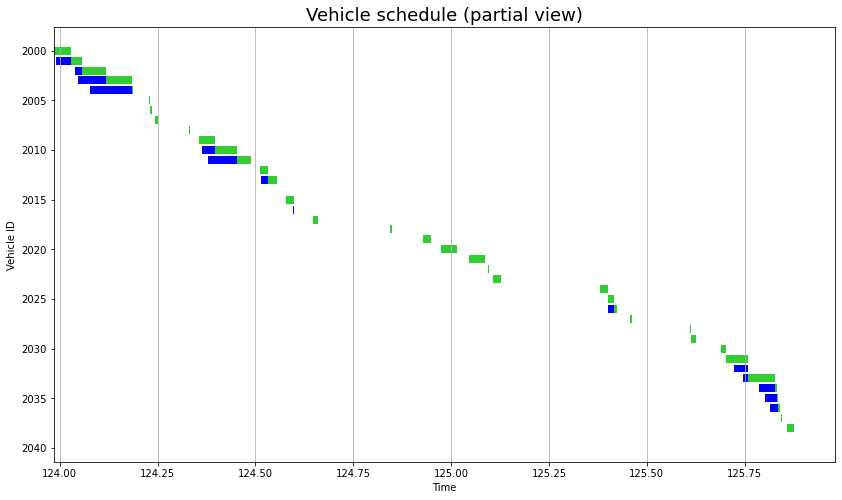

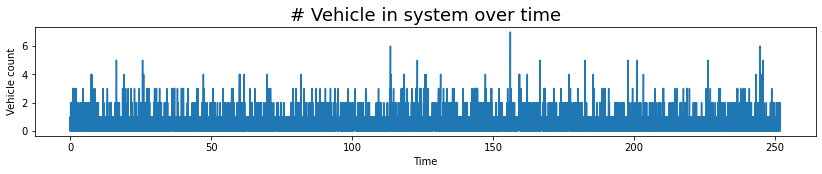

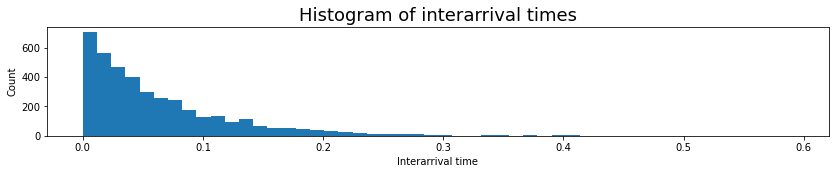

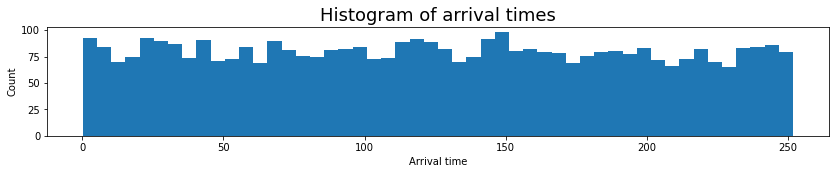

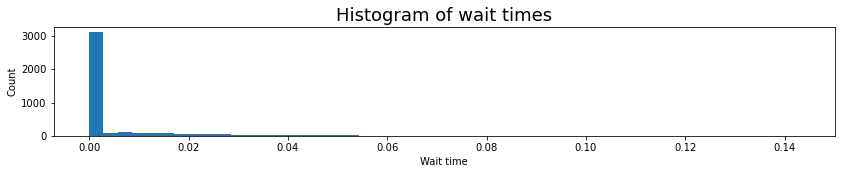

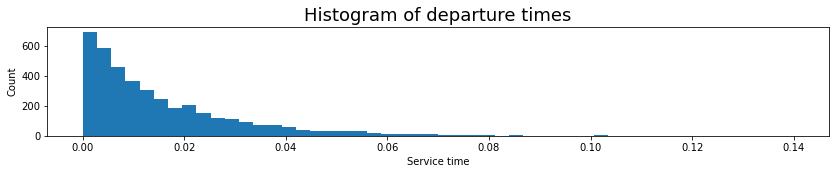

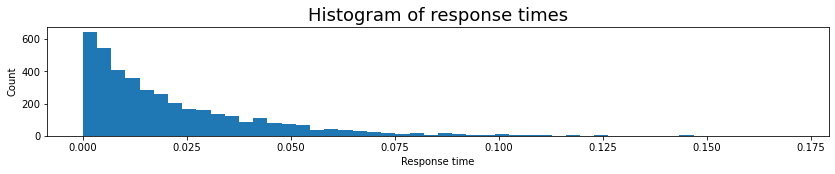

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=32.0000, $1/\lambda$=0.0625, $1/\mu$=0.0312

Simulation statistics
---------------------
total_duration          = 256.3009
arrival_rate_mean       = 15.6220
interarrival_time_mean  = 0.0640
response_time
  mean                  = 0.0573
  var                   = 0.0032
  p50                   = 0.0401
  p75                   = 0.0789
  p90                   = 0.1296
  p95                   = 0.1658
  p99                   = 0.2597
wait_time_mean          = 0.0266
departure_rate_mean       = 32.4994
departure_time_mean       = 0.0308
num_vehicles_in_system_mean = 0.8950
num_vehicles_in_queue_mean  = 0.4148
throughput_mean         = 15.5642
utilization             = 0.4802

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 0.8950
arrival_rate_mean * response_time_mean = 0.8959 (= 15.6220 * 0.0573)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.4802
arrival_rate_mean  

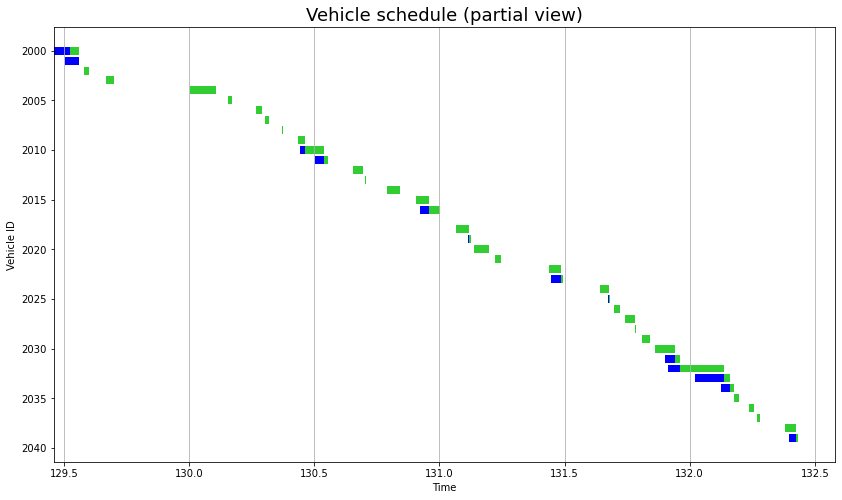

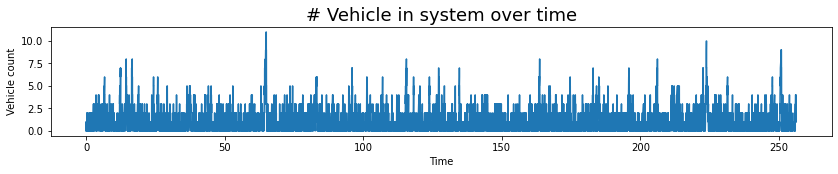

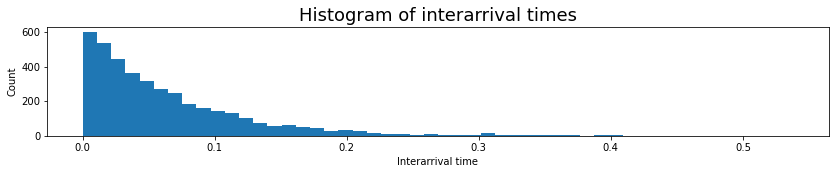

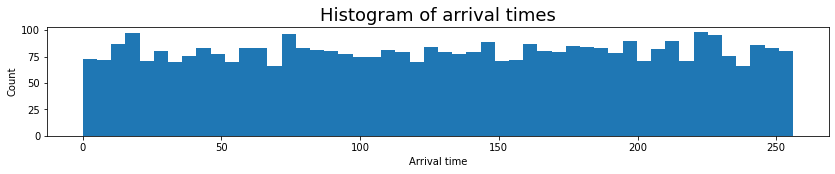

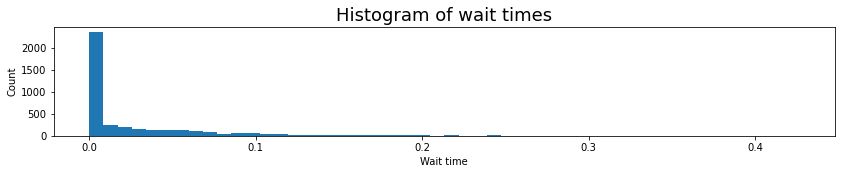

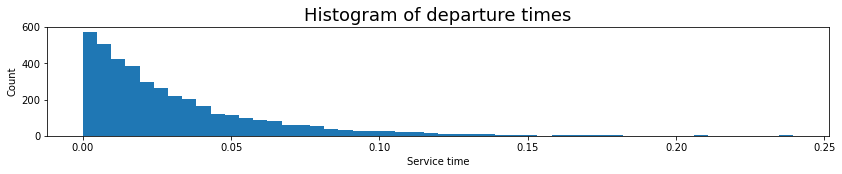

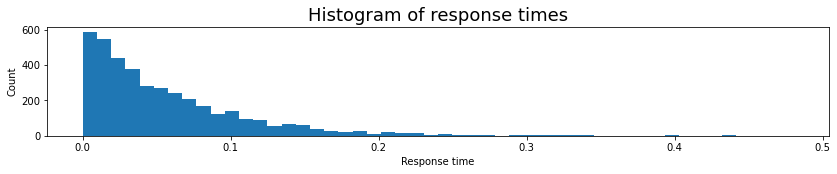

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=18.0000, $1/\lambda$=0.0625, $1/\mu$=0.0556

Simulation statistics
---------------------
total_duration          = 244.3496
arrival_rate_mean       = 16.4012
interarrival_time_mean  = 0.0610
response_time
  mean                  = 0.5366
  var                   = 0.1796
  p50                   = 0.4509
  p75                   = 0.7950
  p90                   = 1.1169
  p95                   = 1.3489
  p99                   = 1.8608
wait_time_mean          = 0.4811
departure_rate_mean       = 18.0325
departure_time_mean       = 0.0555
num_vehicles_in_system_mean = 8.7834
num_vehicles_in_queue_mean  = 7.8756
throughput_mean         = 16.3265
utilization             = 0.9078

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 8.7834
arrival_rate_mean * response_time_mean = 8.8001 (= 16.4012 * 0.5366)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.9078
arrival_rate_mean  

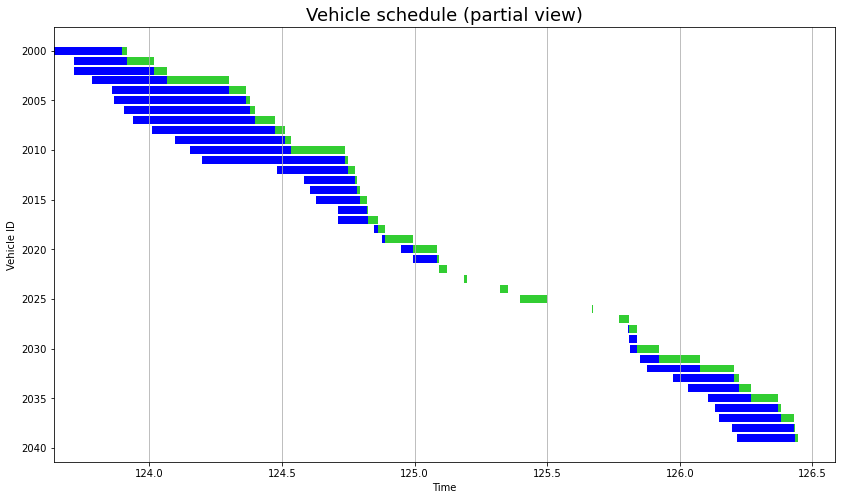

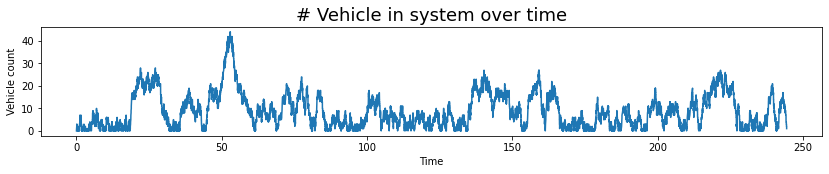

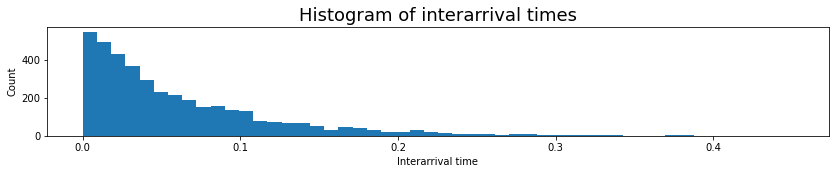

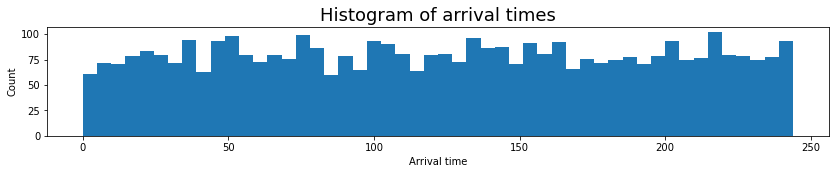

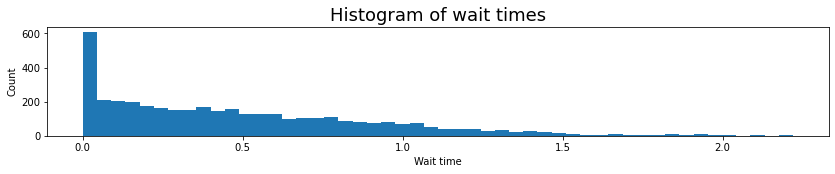

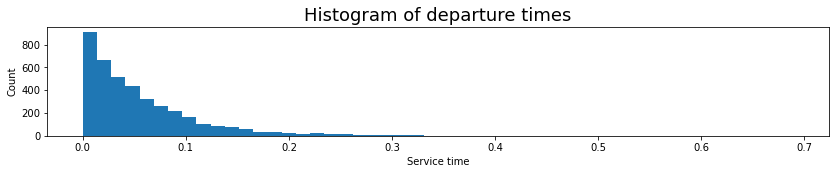

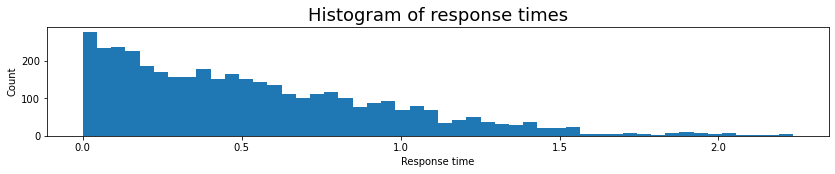

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=16.0000, $1/\lambda$=0.0625, $1/\mu$=0.0625

Simulation statistics
---------------------
total_duration          = 251.2038
arrival_rate_mean       = 16.1685
interarrival_time_mean  = 0.0618
response_time
  mean                  = 4.6020
  var                   = 2.2234
  p50                   = 4.5470
  p75                   = 5.1971
  p90                   = 6.8201
  p95                   = 7.4726
  p99                   = 7.8956
wait_time_mean          = 4.5392
departure_rate_mean       = 15.9340
departure_time_mean       = 0.0628
num_vehicles_in_system_mean = 73.2786
num_vehicles_in_queue_mean  = 72.2793
throughput_mean         = 15.8730
utilization             = 0.9993

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 73.2786
arrival_rate_mean * response_time_mean = 74.4068 (= 16.1685 * 4.6020)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.9993
arrival_rate_me

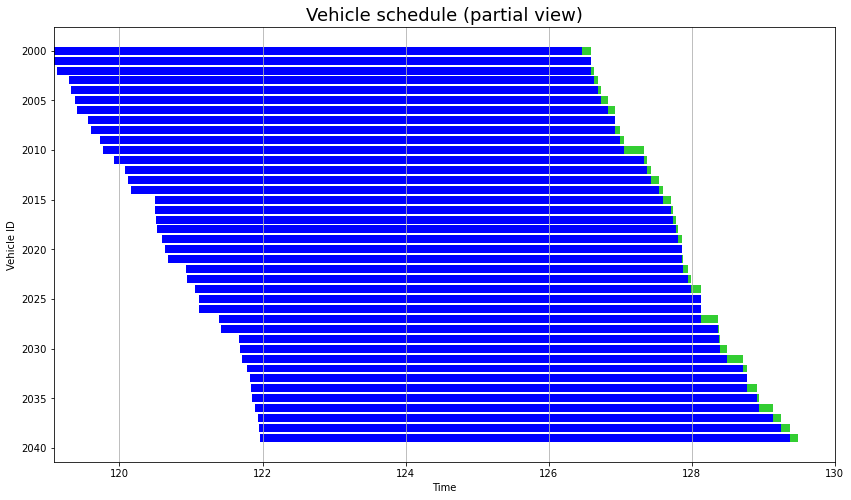

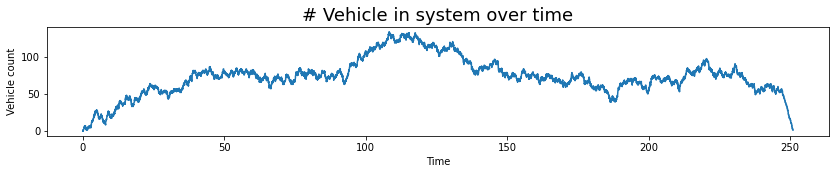

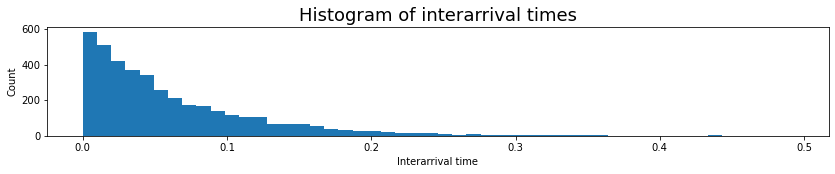

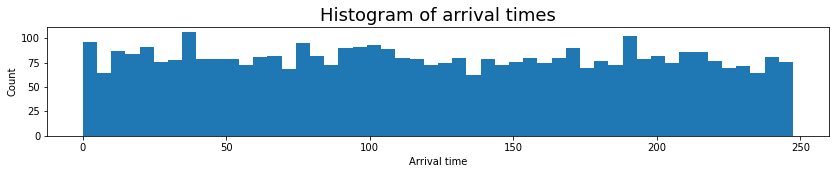

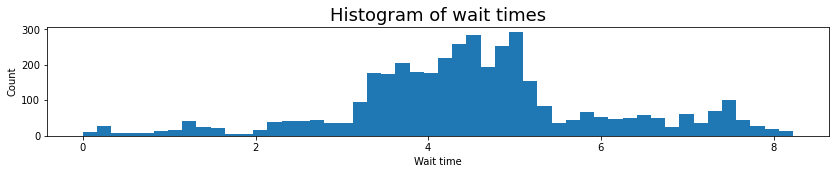

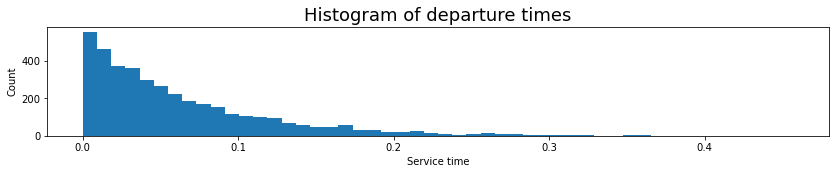

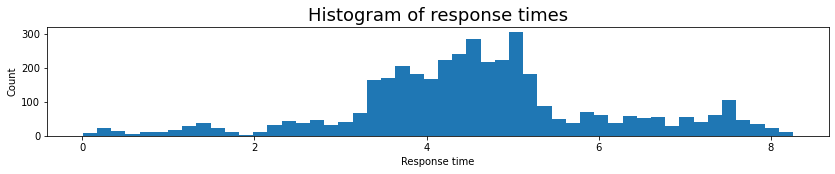

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=15.0000, $1/\lambda$=0.0625, $1/\mu$=0.0667

Simulation statistics
---------------------
total_duration          = 265.0996
arrival_rate_mean       = 16.0321
interarrival_time_mean  = 0.0624
response_time
  mean                  = 7.1964
  var                   = 23.6272
  p50                   = 6.3898
  p75                   = 10.4030
  p90                   = 15.5494
  p95                   = 15.8642
  p99                   = 16.7654
wait_time_mean          = 7.1303
departure_rate_mean       = 15.1223
departure_time_mean       = 0.0661
num_vehicles_in_system_mean = 108.5844
num_vehicles_in_queue_mean  = 107.5866
throughput_mean         = 15.0376
utilization             = 0.9978

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 108.5844
arrival_rate_mean * response_time_mean = 115.3739 (= 16.0321 * 7.1964)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.9978
arriva

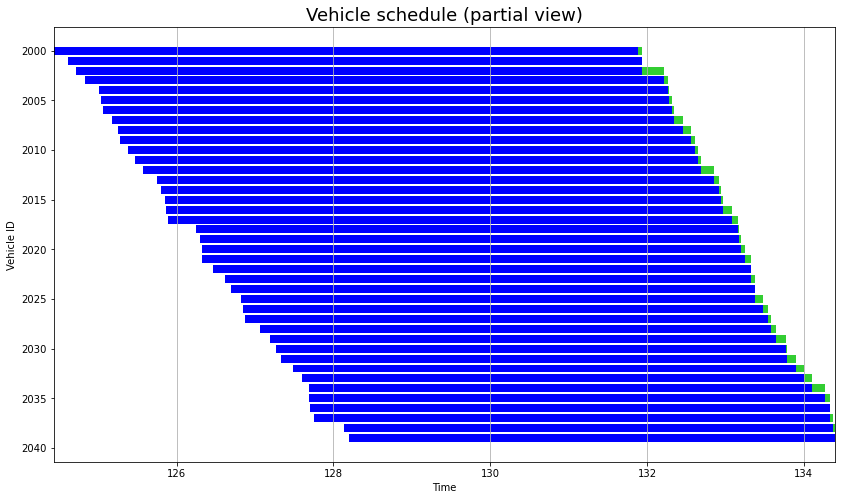

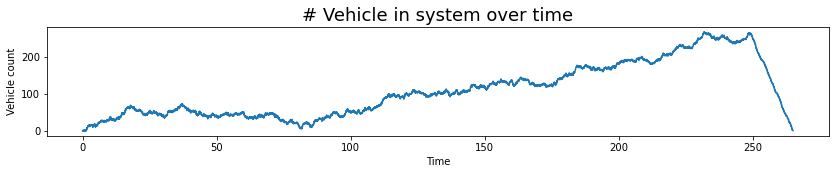

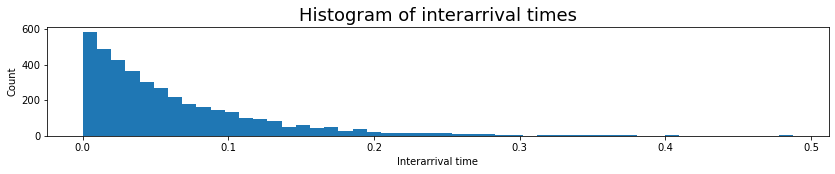

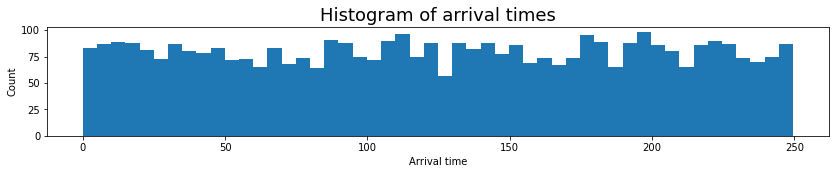

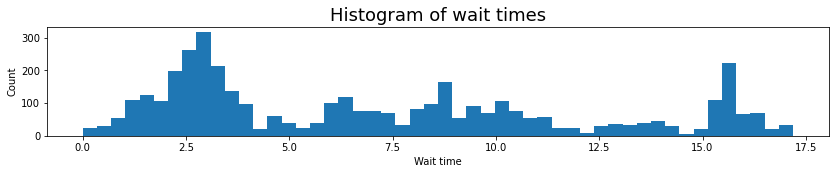

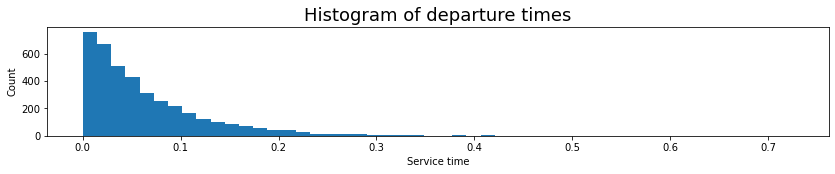

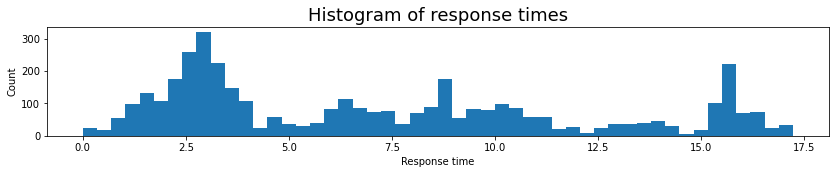

### Simulation: n=4000, $\lambda$=16.0000, $\mu$=12.0000, $1/\lambda$=0.0625, $1/\mu$=0.0833

Simulation statistics
---------------------
total_duration          = 331.3383
arrival_rate_mean       = 16.0082
interarrival_time_mean  = 0.0625
response_time
  mean                  = 40.7483
  var                   = 517.9394
  p50                   = 42.7995
  p75                   = 60.6921
  p90                   = 69.4029
  p95                   = 75.3718
  p99                   = 79.0410
wait_time_mean          = 40.6655
departure_rate_mean       = 12.0742
departure_time_mean       = 0.0828
num_vehicles_in_system_mean = 491.9242
num_vehicles_in_queue_mean  = 490.9243
throughput_mean         = 12.0482
utilization             = 0.9998

Little's Law: E[N] = lambda * E[T]
----------------------------------
num_vehicles_in_system_mean                = 491.9242
arrival_rate_mean * response_time_mean = 652.3074 (= 16.0082 * 40.7483)

Utilization Law, version 1: rho_i = lambda_i / mu_i
---------------------------------------------------
utilization                            = 0.9998
a

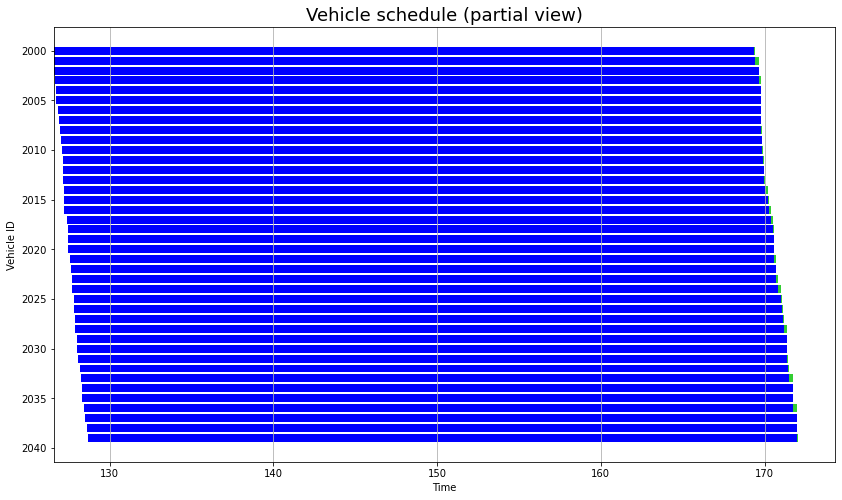

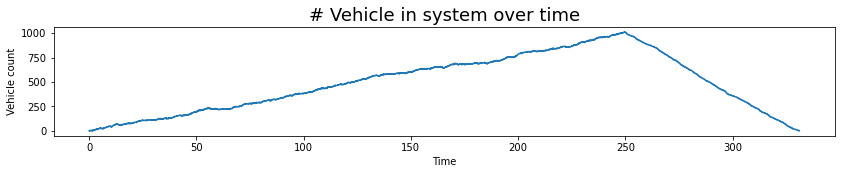

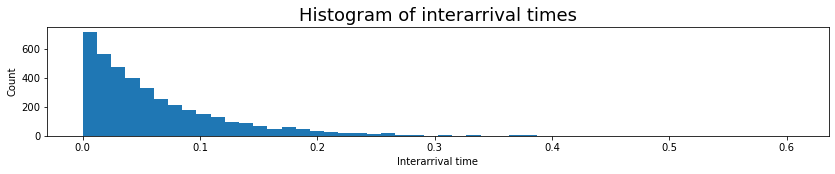

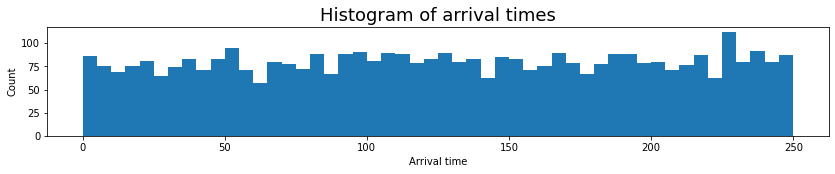

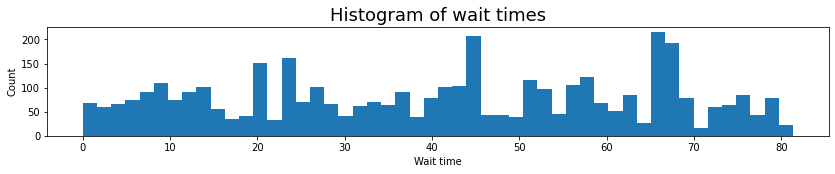

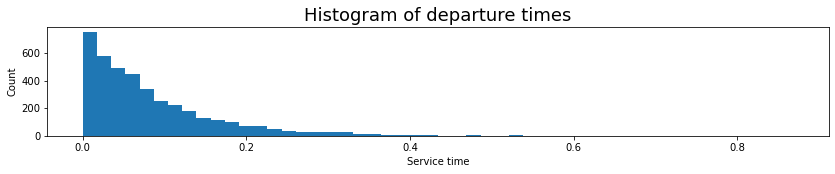

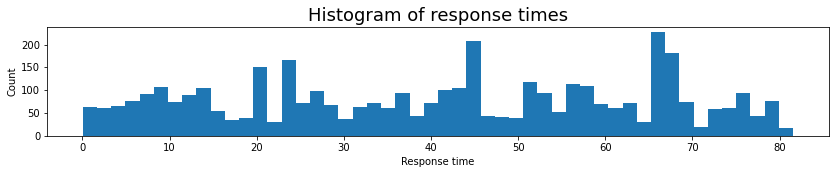

In [66]:
for mu in [64, 32, 18, 16, 15, 12]:
    run_sim_and_plot(4000, 16, mu)

In [69]:
def traffic_light_init():
    traffic_red_time = 100
    traffic_yellow_time = 5
    traffic_green_time = 25
    traffic_state = [traffic_red_time, traffic_yellow_time, traffic_green_time]
    return np.random.choice(traffic_state)

In [131]:


interarrival_times = rng.exponential(scale=10, size=1000)
arrival_times = np.cumsum(interarrival_times)

# if(traffic_light_init == 100):
#     wait_traffic_light_time = np.mod(arrival_times, 130.0)

In [125]:
arrival_times.dtype

dtype('float64')

In [132]:
traffic_time = 130.0
wait_traffic_light_time = np.mod(arrival_times, traffic_time)

In [133]:
wait_traffic_light_time

array([  7.45553428,   7.51839285,  34.40179495,  49.65244215,
        66.15707176,  68.78358383,  78.10711724,  83.75660658,
        94.09650685,  94.87465571, 105.94242714, 115.31460775,
       116.67987879, 119.72940534,   3.56581074,   7.40691793,
        11.57949458,  29.21041083,  45.71520079,  55.41482104,
        60.72671757,  93.09999072,  99.86719325, 102.22918112,
       105.75098681, 108.07641517, 117.00592454, 121.91638895,
       124.12674306, 125.169933  , 127.32444784,   3.02724552,
         9.13699152,  19.72638464,  39.63771952,  49.12394515,
        57.86965268,  64.10714608,  79.37969795,  80.40376106,
        82.6841477 , 100.30821801, 115.3214393 , 121.3224363 ,
       127.61993862,   2.71725542,   3.30981519,  12.94930775,
        24.36069025,  26.29943695,  30.80908859,  43.66449471,
        47.02111042,  84.45492771,  90.34405014,  92.19112227,
       107.29460335,  28.88010141,  39.22863832,  63.20750311,
        71.42522784,  75.98294602,  77.19767442,  82.71

In [8]:
import numpy as np
rng = np.random.default_rng(32)
interarrival_times = rng.exponential(scale=10, size=1000)
arrival_times = np.cumsum(interarrival_times)
traffic_time = 130.0
wt = np.mod(arrival_times, traffic_time)
wt_out = np.where(wt < 100.0 , 100.0 -wt, 0)

In [5]:
wt_out

array([94.28121338, 77.42496676, 71.89757877, 68.55399372, 52.71733462,
       50.65085685, 42.85435767, 22.25829382,  9.48574845,  8.33188592,
        1.52679533,  0.        , 95.96576547, 90.26172793, 81.4010091 ,
       78.77846763, 76.62037764, 66.66990254, 64.41081636, 26.37806733,
       26.27789918, 23.32861462,  5.2665998 ,  0.        , 98.18709639,
       97.36014476, 94.252683  , 92.11575264, 84.45431783, 82.95407898,
       82.36573976, 69.02974305, 44.23755485, 37.7100273 , 22.42598598,
       18.93577133, 10.50362224,  1.1315513 ,  0.        ,  0.        ,
       94.38413861, 93.17579393, 78.9860784 , 65.23122854, 44.79676505,
       42.06467344, 28.65098853,  0.        ,  0.        , 76.56869531,
       70.01051451, 56.80454101, 49.55805668, 43.7942014 , 15.31590385,
       12.08206108,  4.64778174,  1.65454899,  1.14276139,  0.        ,
        0.        , 88.7123625 , 84.76278918, 82.0755124 , 77.09977663,
       40.11223458, 26.5935197 , 12.3566865 ,  0.        ,  0.  

In [6]:
wt

array([  5.71878662,  22.57503324,  28.10242123,  31.44600628,
        47.28266538,  49.34914315,  57.14564233,  77.74170618,
        90.51425155,  91.66811408,  98.47320467, 124.25458445,
         4.03423453,   9.73827207,  18.5989909 ,  21.22153237,
        23.37962236,  33.33009746,  35.58918364,  73.62193267,
        73.72210082,  76.67138538,  94.7334002 , 129.83097803,
         1.81290361,   2.63985524,   5.747317  ,   7.88424736,
        15.54568217,  17.04592102,  17.63426024,  30.97025695,
        55.76244515,  62.2899727 ,  77.57401402,  81.06422867,
        89.49637776,  98.8684487 , 112.89113941, 123.23468386,
         5.61586139,   6.82420607,  21.0139216 ,  34.76877146,
        55.20323495,  57.93532656,  71.34901147, 112.79182616,
       123.72795591,  23.43130469,  29.98948549,  43.19545899,
        50.44194332,  56.2057986 ,  84.68409615,  87.91793892,
        95.35221826,  98.34545101,  98.85723861, 115.04230187,
       128.65999565,  11.2876375 ,  15.23721082,  17.92

In [ ]:
departure_times = 2

In [19]:
import pandas as pd
n =1000
vehicles_df = pd.DataFrame({
        "interarrival_time": interarrival_times,
        "arrive_time": arrival_times,
        "departure_time": np.zeros(n),
        "start_time": np.zeros(n),
        "depart_time": np.zeros(n)
    })
vehicles_df.loc[0, "start_time"] = vehicles_df.loc[0, "arrive_time"]
vehicles_df.loc[0, "depart_time"] = vehicles_df.loc[0, "start_time"] + wt_out[0]

In [20]:
vehicles_df.loc[0, "depart_time"]

100.0

In [17]:
import numpy as np
import random
import pandas as pd
x = np.array([])  

In [18]:
x = np.append(x, 2.0)


In [20]:
x = np.append(x, 4.0)

In [23]:
x =np.append(0.8)

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [ ]:
#generate the iinterarrival values
rng = np.random.default_rng(SEED)
interarrival_times = rng.exponential(scale= T_INTERARRIVAL_MEAN, size= SIZE)
arrival_times = np.cumsum(interarrival_times)
delay_times = rng.triangular(3,5,7, size= SIZE)

traffic_time = T_RED + T_YELLOW + T_GREEN
traffic_stop_time = T_RED + T_YELLOW
wt = np.mod(arrival_times, traffic_time)
wt_out = np.where(wt < traffic_stop_time , traffic_stop_time -wt, 0)
wait_times = np.add(wt_out, delay_times)
departure_times = np.zeros(SIZE)

#first departure time
departure_times[0]= arrival_times[0] + wait_times[0]

for i in range(1, SIZE):
    departure_times[i]= departure_times[i-1] + delay_times[i]
    
#make adjustment for the wait time
div, remainder = np.divmod(departure_times, 130)
add_wait_times = np.multiply(div, 130)
new_departure_times = np.add(departure_times, add_wait_times)
num_traffic_cycle = np.add(div, 1)

new_wait_times = np.subtract(new_departure_times, arrival_times)


# for i in range(1,SIZE):
#     departure_time= arrival_times[i] + wt_out[0] + delay()
#     if(is_red_light(departure_time)):
#         temp = np.add(wt_out[i:], 100)
#         wt_out = np.insert(temp, i, wt_out[:i])
#         departure_time = arrival_times[i] + wt_out[0] + delay()
#         del temp
#     departure_times[i] = departure_time
    